In [1]:
# low = lower range for variables, high = higher range for variables
def genesis(size,var, high , low):
   pop_size = (size,var)
   new_pop = np.random.uniform(low=low,high=high,size=pop_size)
   return new_pop

In [2]:
def fitness(p):
# Evaluating fitness Interference function "double fit (doublep[])".
   fitness=np.zeros((len(p),1))
   for i in range(len(p)):
       x,y,z = p[i][0] , p[i][1] , p[i][2]
        # Define your fitness function here
       fitness[i,0] = 2*x*z*math.e-2*y**3+y**2-3*z**3
   return fitness

In [3]:
def selection(pop, fitness, num_parents):
   parents = np.empty((num_parents, pop.shape[1]))
   for parent_num in range(num_parents):
      max_fitness_idx = np.where(fitness == np.max(fitness))
      max_fitness_idx = max_fitness_idx[0][0]
      parents[parent_num, :] = pop[max_fitness_idx, :]
      fitness[max_fitness_idx] = -99999999999
   return parents

In [4]:
def crossover(parents, offspring_size):
   offspring = np.empty(offspring_size)
   crossover_point = np.uint8(offspring_size[1]/2)
   for k in range(offspring_size[0]):
      parent1_idx = k%parents.shape[0]
      parent2_idx = (k+1)%parents.shape[0]
      offspring[k, 0:crossover_point] = parents[parent1_idx,     0:crossover_point]
      offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
   return offspring

In [5]:
def mutation(offspring_crossover):
   for idx in range(offspring_crossover.shape[0]):
      random_value = np.random.uniform(-10, 10, 1)
# 10 percent change maximum keeping 90 percent mutation rate 
      i= randint(0, 2)
      offspring_crossover[idx, i] = offspring_crossover[idx, i] + random_value 
   return offspring_crossover

In [6]:
import numpy as np
from random import randint
import math

num_var = 3
sizeof_pop= 100
upper_limit = 100
lower_limit = -100
num_parents = 2

population = genesis(sizeof_pop , num_var, upper_limit ,lower_limit)
print(population)
Scores=[]
num_generations = 20
for generation in range(num_generations):
   print("\n\nGeneration : ", generation)
   fitness_score = fitness(population)
   parents = selection(population, fitness_score, num_parents)
   print("Best Parents \n",parents)
   offspring_crossover = crossover(parents, offspring_size=(2*num_parents, num_var))
   offspring_mutation = mutation(offspring_crossover)
   print("Mutated OffSprings\n",offspring_mutation)
   population[0:parents.shape[0], :] = parents
   population[parents.shape[0]:6, :] = offspring_mutation
   Scores.append(np.max(fitness_score))
   print("Best result : ", np.max(fitness_score))

[[ 6.40060151e+01 -3.65395128e+00  2.34257637e+01]
 [-2.22626609e+01  4.40644187e+01  7.85715276e+01]
 [ 8.71638004e+01  7.48280067e+01 -5.36670092e+01]
 [-5.35832554e+01 -3.19908057e+01  2.47616634e+01]
 [-8.60979303e+01 -7.26151374e+00  2.66060868e+01]
 [-1.52660635e+01 -5.95734415e+01  4.92401318e+01]
 [ 8.81102405e+01 -4.65422693e+01 -1.94397299e+01]
 [-2.66267016e+00 -8.40206117e+01  1.47953825e+01]
 [ 9.12689472e+01 -1.62053928e+01 -3.88015127e+00]
 [ 6.33129978e+01  7.93306338e+01  6.30251483e+00]
 [-5.96596212e+01 -1.77749396e+01  5.30034593e+01]
 [-2.03590880e+00 -1.32380360e+01  6.62669048e+01]
 [-3.13587983e+01 -2.23497034e+01 -7.47481840e+01]
 [-6.89928024e+01 -8.65038047e+01  4.47825131e+01]
 [-1.98849727e+01 -2.01902197e+01  8.80777569e+01]
 [ 2.31024779e+01  3.81167694e+01 -1.27486259e+01]
 [ 3.79373788e+01 -6.83947242e+01  5.91279241e+00]
 [ 9.86043735e+00 -8.88240543e+01  9.18185889e+01]
 [ 4.62581281e+01  6.47518265e+01  9.62102753e+01]
 [-8.20788851e+01  9.52218699e+

/tmp/ipykernel_21526/4059749975.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  offspring_crossover[idx, i] = offspring_crossover[idx, i] + random_value


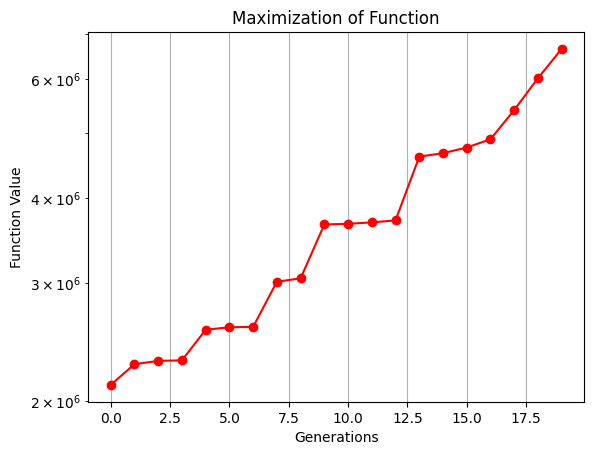

In [7]:
import matplotlib.pyplot as plt
Evaluations = Scores
plt.plot(Evaluations,'o-',color='red')
plt.yscale('log')
plt.xlabel('Generations')
plt.ylabel('Function Value')
plt.title("Maximization of Function")
plt.grid(True)
plt.show()
